In case of doubts refer to the documentation on https://clipper.ai.
This example uses `matplotlib`, in case you cannot use it, please comment out a part of cell 3

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch: 0050 cost= 0.106509171 W= 0.345775 b= 0.109547
Epoch: 0100 cost= 0.103094369 W= 0.340054 b= 0.150698
Epoch: 0150 cost= 0.100074120 W= 0.334674 b= 0.189403
Epoch: 0200 cost= 0.097402938 W= 0.329614 b= 0.225805
Epoch: 0250 cost= 0.095040426 W= 0.324855 b= 0.260043
Epoch: 0300 cost= 0.092950977 W= 0.320379 b= 0.292244
Epoch: 0350 cost= 0.091103069 W= 0.316169 b= 0.32253
Epoch: 0400 cost= 0.089468762 W= 0.312209 b= 0.351014
Epoch: 0450 cost= 0.088023409 W= 0.308485 b= 0.377805
Epoch: 0500 cost= 0.086745158 W= 0.304982 b= 0.403003
Optimization Finished!
Training cost= 0.0867452 W= 0.304982 b= 0.403003 

Model saved in path: /tmp/tf/model.ckpt


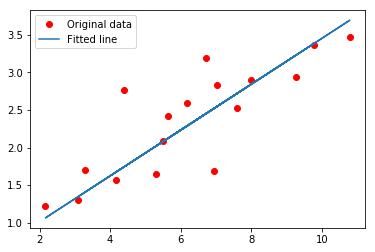

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 500
display_step = 50
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
# tf Graph Input
# You must name the variables and placeholders, as the names will be later used!!!
X = tf.placeholder("float", name='X')
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b, name='pred')
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
saver = tf.train.Saver()
# Start training
# sess = tf.Session()
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Save the variables to disk.
    save_path = saver.save(sess, "/tmp/tf/model.ckpt")
    print("Model saved in path: %s" % save_path)
    
    #Graphic display - matplotlib
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


In [4]:
# import the inspect_checkpoint library
from tensorflow.python.tools import inspect_checkpoint as chkp

# print all tensors in checkpoint file
chkp.print_tensors_in_checkpoint_file("/tmp/tf/model.ckpt", tensor_name='', all_tensors=True)

tensor_name:  bias
0.403003
tensor_name:  weight
0.304982


In [5]:
def predict(sess, inputs):
    preds = sess.run('pred:0', feed_dict={'X:0': inputs}) 
    # `X` is used, it must be defined in the model with that name explicitly!
    return [str(p) for p in preds]

In [6]:
from clipper_admin import ClipperConnection, DockerContainerManager
from clipper_admin.deployers.tensorflow import deploy_tensorflow_model
clipper_conn = ClipperConnection(DockerContainerManager())

In [7]:
clipper_conn.start_clipper()

19-05-31:11:15:33 INFO     [docker_container_manager.py:154] [default-cluster] Starting managed Redis instance in Docker
19-05-31:11:15:35 INFO     [docker_container_manager.py:232] [default-cluster] Metric Configuration Saved at /tmp/tmp0blkglx5.yml
19-05-31:11:15:36 INFO     [clipper_admin.py:143] [default-cluster] Clipper is running


In [8]:
# You can see some Clipper containers by simply running:
!docker ps

CONTAINER ID        IMAGE                                 COMMAND                  CREATED              STATUS              PORTS                                            NAMES
a1bb2cc426e5        prom/prometheus:v2.1.0                "/bin/prometheus --c…"   About a minute ago   Up About a minute   0.0.0.0:9090->9090/tcp                           metric_frontend-56759
9cffb7817bdd        clipper/frontend-exporter:develop     "python /usr/src/app…"   About a minute ago   Up About a minute                                                    query_frontend_exporter-68127
18ddfb869d72        clipper/query_frontend:develop        "/clipper/release/sr…"   About a minute ago   Up About a minute   0.0.0.0:1337->1337/tcp, 0.0.0.0:7000->7000/tcp   query_frontend-68127
cb42ba84d0d8        clipper/management_frontend:develop   "/clipper/release/sr…"   About a minute ago   Up About a minute   0.0.0.0:1338->1338/tcp                           mgmt_frontend-30499
4cac7d187b83        redis:alpine    

In [9]:
clipper_conn.connect()

19-05-31:11:16:48 INFO     [clipper_admin.py:156] [default-cluster] Successfully connected to Clipper cluster at localhost:1337


In [10]:
# List all applications
clipper_conn.get_all_apps()

[]

In [11]:
# List all models
clipper_conn.get_all_models()

[]

In [12]:
# Add an application with a name and an input type
clipper_conn.register_application(
    name="tf-app", input_type="doubles", default_output="-1.0", slo_micros=100000)

19-05-31:11:16:51 INFO     [clipper_admin.py:220] [default-cluster] Application tf-app was successfully registered


In [13]:
# Deploy a model, to check what arguments you need run 
# "?deploy_tensorflow_model" to let the notebook show you the definition of the method
deploy_tensorflow_model(
    clipper_conn,
    name="tf-mod",
    version=1,
    input_type="doubles",
    func=predict,
    tf_sess_or_saved_model_path="/tmp/tf/") # path to saved model files is used,
# session example in the next section

19-05-31:11:16:51 INFO     [deployer_utils.py:41] Saving function to /tmp/tmpo6h5yptpclipper
19-05-31:11:16:51 INFO     [deployer_utils.py:51] Serialized and supplied predict function
19-05-31:11:16:51 INFO     [tensorflow.py:264] TensorFlow model copied to: tfmodel 
19-05-31:11:16:51 INFO     [tensorflow.py:277] Using Python 3.6 base image
19-05-31:11:16:51 INFO     [clipper_admin.py:513] [default-cluster] Building model Docker image with model data from /tmp/tmpo6h5yptpclipper
19-05-31:11:16:51 INFO     [clipper_admin.py:518] [default-cluster] Step 1/2 : FROM clipper/tf36-container:develop
19-05-31:11:16:51 INFO     [clipper_admin.py:518] [default-cluster]  ---> a3706e37473b
19-05-31:11:16:51 INFO     [clipper_admin.py:518] [default-cluster] Step 2/2 : COPY /tmp/tmpo6h5yptpclipper /model/
19-05-31:11:16:51 INFO     [clipper_admin.py:518] [default-cluster]  ---> 8374c6028ad1
19-05-31:11:16:51 INFO     [clipper_admin.py:518] [default-cluster] Successfully built 8374c6028ad1
19-05-31:11

In [14]:
# Link the model and the app
clipper_conn.link_model_to_app(
    app_name="tf-app",
    model_name="tf-mod")

19-05-31:11:16:58 INFO     [clipper_admin.py:282] [default-cluster] Model tf-mod is now linked to application tf-app


In [15]:
# Show the apps again, should list one
clipper_conn.get_all_apps()

['tf-app']

In [16]:
# Get query address
query_address = clipper_conn.get_query_addr()

In [17]:
# Run a query
import requests, json, numpy as np
headers = {"Content-type": "application/json"}
requests.post("http://"+query_address+"/tf-app/predict", headers=headers, data=json.dumps({
    "input": [.8, 3.2]})).json()

{'query_id': 0, 'output': '[0.6469889 1.3789468]', 'default': False}

In [18]:
# Clipper allows to deploy a TensorFlow model using a session variable too
# First the model must be restored from the files
# Pay attention to the fact that variables/placeholders are restored 
# with exactly the same names
tf.reset_default_graph()

W = tf.get_variable("weight", shape=[])
b = tf.get_variable("bias", shape=[])

X = tf.placeholder("float", name='X')
pred = tf.add(tf.multiply(X, W), b, name='pred')

saver = tf.train.Saver()
sess = tf.Session()

# Restore variables from disk.
saver.restore(sess, "/tmp/tf/model.ckpt")
print("Model restored.")
print("W : %s" % W.eval(session=sess))
print("b : %s" % b.eval(session=sess))

Instructions for updating:
Use standard file APIs to check for files with this prefix.


19-05-31:11:17:12 WARNING  [deprecation.py:323] From /home/cloud-user/.pyenv/versions/3.6.8/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /tmp/tf/model.ckpt


19-05-31:11:17:12 INFO     [saver.py:1270] Restoring parameters from /tmp/tf/model.ckpt


Model restored.
W : 0.304982
b : 0.403003


In [19]:
# Check that the session variable exists
sess

In [20]:
deploy_tensorflow_model(
    clipper_conn,
    name="tf-mod",
    version=2, # version 2 of the same model, `predict` endpoint will be updated 
    # automatically to the newest model version
    input_type="doubles",
    func=predict,
    tf_sess_or_saved_model_path=sess) # `sess` variable is used here

19-05-31:11:17:28 INFO     [deployer_utils.py:41] Saving function to /tmp/tmpkv4jlb9fclipper
19-05-31:11:17:28 INFO     [deployer_utils.py:51] Serialized and supplied predict function
19-05-31:11:17:28 INFO     [tensorflow.py:196] TensorFlow model saved at: /tmp/tmpkv4jlb9fclipper/tfmodel/model.ckpt 
19-05-31:11:17:28 INFO     [tensorflow.py:277] Using Python 3.6 base image
19-05-31:11:17:28 INFO     [clipper_admin.py:513] [default-cluster] Building model Docker image with model data from /tmp/tmpkv4jlb9fclipper
19-05-31:11:17:29 INFO     [clipper_admin.py:518] [default-cluster] Step 1/2 : FROM clipper/tf36-container:develop
19-05-31:11:17:29 INFO     [clipper_admin.py:518] [default-cluster]  ---> a3706e37473b
19-05-31:11:17:29 INFO     [clipper_admin.py:518] [default-cluster] Step 2/2 : COPY /tmp/tmpkv4jlb9fclipper /model/
19-05-31:11:17:29 INFO     [clipper_admin.py:518] [default-cluster]  ---> 06fe46f068a4
19-05-31:11:17:29 INFO     [clipper_admin.py:518] [default-cluster] Successfu

In [21]:
# Session can be closed now
sess.close()

In [22]:
# Run a query
headers = {"Content-type": "application/json"}
requests.post("http://"+query_address+"/tf-app/predict", headers=headers, data=json.dumps({
    "input": [.8, 3.2]})).json()
# The result is the same

{'query_id': 1, 'output': '[0.6469889 1.3789468]', 'default': False}

In [23]:
# You can revert to the previous model version, the query endpoint remains the same
clipper_conn.set_model_version("tf-mod", "1")

In [24]:
# Replicate the model 5 times
clipper_conn.set_num_replicas("tf-mod", 5)

19-05-31:11:17:50 INFO     [docker_container_manager.py:356] [default-cluster] Found 1 replicas for tf-mod:1. Adding 4


In [25]:
# Back to one replica
clipper_conn.set_num_replicas("tf-mod", 1)

19-05-31:11:17:58 INFO     [docker_container_manager.py:382] [default-cluster] Found 5 replicas for tf-mod:1. Removing 4


In [26]:
# You can also register more applications - connections to the model and link them to it
clipper_conn.register_application(
    name="tf-app-extra", input_type="doubles", default_output="-1.0", slo_micros=100000)
# You have to link them the standard way. You can also link an existing application 
# to another model if you wish using the same method
clipper_conn.link_model_to_app(
    app_name="tf-app-extra",
    model_name="tf-mod")

19-05-31:11:18:39 INFO     [clipper_admin.py:220] [default-cluster] Application tf-app-extra was successfully registered
19-05-31:11:18:39 INFO     [clipper_admin.py:282] [default-cluster] Model tf-mod is now linked to application tf-app-extra


In [27]:
# Run a query with an endpoint `tf-app-extra/predict`
headers = {"Content-type": "application/json"}
requests.post("http://"+query_address+"/tf-app-extra/predict", headers=headers, data=json.dumps({
    "input": [.8, 3.2]})).json()

{'query_id': 2, 'output': '[0.6469889 1.3789468]', 'default': False}

In [28]:
# Unlink the model and the apps
clipper_conn.unlink_model_from_app(model_name="tf-mod", app_name="tf-app")
clipper_conn.unlink_model_from_app(model_name="tf-mod", app_name="tf-app-extra")

19-05-31:11:19:24 INFO     [clipper_admin.py:323] Model tf-mod is now removed to application tf-app
19-05-31:11:19:24 INFO     [clipper_admin.py:323] Model tf-mod is now removed to application tf-app-extra


In [29]:
# Stop the model
clipper_conn.stop_models('tf-mod')

19-05-31:11:19:47 INFO     [clipper_admin.py:1238] [default-cluster] Stopped all containers for these models and versions:
{'tf-mod': ['1', '2']}


In [30]:
# Remove the apps
clipper_conn.delete_application('tf-app')
clipper_conn.delete_application('tf-app-extra')

19-05-31:11:19:47 INFO     [clipper_admin.py:239] [default-cluster] Application tf-app was successfully deleted
19-05-31:11:19:47 INFO     [clipper_admin.py:239] [default-cluster] Application tf-app-extra was successfully deleted


In [31]:
# Stop Clipper
clipper_conn.stop_all()

19-05-31:11:20:18 INFO     [clipper_admin.py:1324] [default-cluster] Stopped all Clipper cluster and all model containers


In [32]:
# Check that all docker processes are stopped
!docker ps

CONTAINER ID        IMAGE               COMMAND             CREATED             STATUS              PORTS               NAMES
